In [2]:
import torch

In [3]:
!ls ../_dataset/

041.pt	054.pt	067.pt	080.pt	093.pt	106.pt	119.pt	132.pt	145.pt	158.pt
042.pt	055.pt	068.pt	081.pt	094.pt	107.pt	120.pt	133.pt	146.pt	159.pt
043.pt	056.pt	069.pt	082.pt	095.pt	108.pt	121.pt	134.pt	147.pt	160.pt
044.pt	057.pt	070.pt	083.pt	096.pt	109.pt	122.pt	135.pt	148.pt	161.pt
045.pt	058.pt	071.pt	084.pt	097.pt	110.pt	123.pt	136.pt	149.pt	162.pt
046.pt	059.pt	072.pt	085.pt	098.pt	111.pt	124.pt	137.pt	150.pt	163.pt
047.pt	060.pt	073.pt	086.pt	099.pt	112.pt	125.pt	138.pt	151.pt	164.pt
048.pt	061.pt	074.pt	087.pt	100.pt	113.pt	126.pt	139.pt	152.pt	165.pt
049.pt	062.pt	075.pt	088.pt	101.pt	114.pt	127.pt	140.pt	153.pt	166.pt
050.pt	063.pt	076.pt	089.pt	102.pt	115.pt	128.pt	141.pt	154.pt	167.pt
051.pt	064.pt	077.pt	090.pt	103.pt	116.pt	129.pt	142.pt	155.pt
052.pt	065.pt	078.pt	091.pt	104.pt	117.pt	130.pt	143.pt	156.pt
053.pt	066.pt	079.pt	092.pt	105.pt	118.pt	131.pt	144.pt	157.pt


In [7]:
ds_path = '../_dataset/050.pt'

In [8]:
dataset = torch.load(ds_path)

/tmp/ipykernel_72820/2341027244.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load(ds_path)


In [4]:
rename_mappings = {
    'target_robot_position_trans': 'target_robot_position.translation',
    'target_robot_position_quat': 'target_robot_position.quaternion',
    'robot_position_trans': 'robot_position.translation',
    'robot_position_quat': 'robot_position.quaternion'}

# for k, v in rename_mappings.items():
#     dataset[v] = dataset[k]
#     del dataset[k]

In [5]:
from pathlib import Path
from tqdm import tqdm

for file_path in tqdm(Path('../_dataset').iterdir(), desc="Processing files"):
    if file_path.is_file():
        dataset = torch.load(file_path)
        for old_key, new_key in rename_mappings.items():
            if old_key in dataset:
                dataset[new_key] = dataset.pop(old_key)
        torch.save(dataset, file_path)

Processing files: 0it [00:00, ?it/s]/tmp/ipykernel_74430/607111838.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load(file_path)
Processing files: 127i

In [9]:
print('\n'.join(dataset.keys()))

image
target_robot_position_trans
target_robot_position_quat
target_grip
time
delay/image
delay/robot
delay/target
grip
ee_force
base_force
robot_joints
robot_position_trans
robot_position_quat


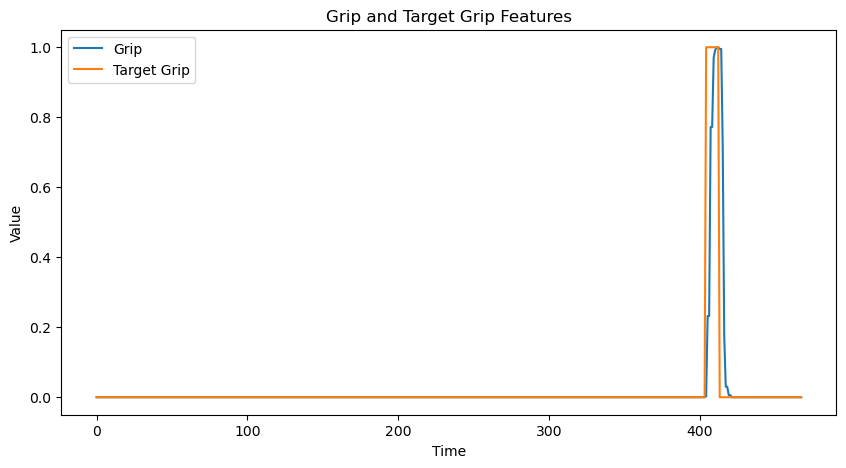

In [7]:
import matplotlib.pyplot as plt

# Extract 'grip' and 'target_grip' features
grip = dataset['grip']
target_grip = dataset['target_grip']

# Create a new figure
plt.figure(figsize=(10, 5))

# Plot 'grip' feature
plt.plot(grip, label='Grip')

# Plot 'target_grip' feature
plt.plot(target_grip, label='Target Grip')

# Add title and labels
plt.title('Grip and Target Grip Features')
plt.xlabel('Time')
plt.ylabel('Value')

# Add legend
plt.legend()

# Show the plot
plt.show()



In [9]:
dataset['time'][:10]

tensor([0.0650, 0.1320, 0.1980, 0.2660, 0.3320, 0.3990, 0.4660, 0.5320, 0.5990,
        0.6660], dtype=torch.float64)

In [10]:
dataset['image'][0][:,:,0]

tensor([[81, 87, 93,  ..., 18, 18, 18],
        [76, 85, 81,  ..., 16, 18, 18],
        [62, 60, 61,  ..., 19, 18, 18],
        ...,
        [44, 44, 44,  ..., 11, 11, 11],
        [44, 43, 46,  ..., 12, 12, 12],
        [45, 45, 45,  ..., 11, 11, 11]], dtype=torch.uint8)

In [11]:
dataset['delay/target'][:10]

tensor([0.0660, 0.0320, 0.0980, 0.0660, 0.0320, 0.0990, 0.0660, 0.0320, 0.0990,
        0.0650], dtype=torch.float64)

In [12]:
dataset['target_robot_position_trans'][:10]

tensor([[ 4.6001e-01, -5.5656e-05,  6.9208e-01],
        [ 4.6190e-01,  1.2561e-03,  6.9063e-01],
        [ 4.6190e-01,  1.2561e-03,  6.9063e-01],
        [ 4.6203e-01,  9.1870e-04,  6.9331e-01],
        [ 4.6274e-01,  6.3808e-04,  6.9141e-01],
        [ 4.6274e-01,  6.3808e-04,  6.9141e-01],
        [ 4.6355e-01, -1.9675e-04,  6.8959e-01],
        [ 4.6544e-01, -1.1327e-03,  6.8686e-01],
        [ 4.6544e-01, -1.1327e-03,  6.8686e-01],
        [ 4.6801e-01, -3.4337e-03,  6.8327e-01]], dtype=torch.float64)